## Building a CNN to classify images.


### รูปภาพที่ให้มามี 4 คลาส โดยมีหมายเลขคลาสดังนี้:
<ol start="0">
<li> bird
<li> cat
<li> deer
<li> frog
</ol>

In [1]:
import time, datetime
import requests, pickle
import numpy as np
from tensorflow import keras
from IPython import display

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os

os.environ['TF_DETERMINISTIC_OPS'] = '1'
# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # uncomment to Disable GPU training

In [3]:
import random, tensorflow as tf

def set_seed(seed_value=12345):
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)
    os.environ['PYTHONHASHSEED'] = str(seed_value)

In [4]:
print('Default GPU Device:', tf.test.gpu_device_name() or 'None')

Default GPU Device: /device:GPU:0


In [5]:
class_names = ['bird', 'cat', 'deer', 'frog']

(X_train_c, y_train_c, X_val_c, y_val_c, X_test_c, y_test_c) = pickle.load(open('Oanchana CHAENGCHAROEN - 364_midterm_data.pkl', "rb"))

# url = "https://drive.google.com/uc?id=1y-Q4R5Txi_IsX-rsS-XTjkhpTiLJiYDh"
# (X_train_c, y_train_c, X_val_c, y_val_c, X_test_c, y_test_c) = pickle.loads(requests.get(url).content)

### ดูรูปภาพในชุดข้อมูล

In [6]:
def show_images(X, y, class_names, n_rows=3, n_cols=8, figsize=(9, 4)):
    fig = plt.figure(figsize=figsize)
    for i in range(0, n_rows):
        for j in range(0, n_cols):
            idx = i*n_cols + j
            image = X[idx]
            label = class_names[y[idx][0]]        
            ax = plt.subplot(n_rows, n_cols, idx+1)
            plt.imshow(image)
            plt.text(16, 36, str(y[idx]) + ' - ' + label, ha='center')
            plt.axis('off')
    plt.tight_layout()
    plt.show()

[0] bird


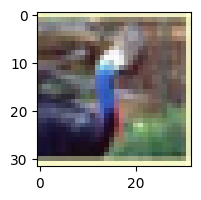

In [7]:
print(y_test_c[1], class_names[y_test_c[1][0]])
plt.figure(figsize=(2, 2))
plt.imshow(X_test_c[1])

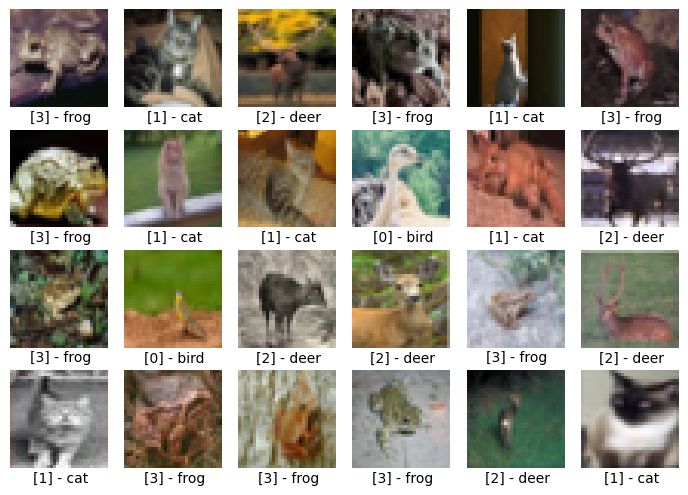

In [8]:
show_images(X_train_c, y_train_c, class_names, 4, 6, figsize=(7, 5))

### Normalize images and One-Hot Encode labels

In [9]:
n_classes = len(class_names)

y_train = keras.utils.to_categorical(y_train_c, n_classes)
y_val = keras.utils.to_categorical(y_val_c, n_classes)
y_test = keras.utils.to_categorical(y_test_c, n_classes)

In [10]:
X_train = X_train_c.astype('float32') / 255
X_val = X_val_c.astype('float32') / 255
X_test = X_test_c.astype('float32') / 255

<style> h3 { margin-top: 0.5em !important; margin-bottom: 0.0em; }
        h4 { margin-top: 0.1em !important; margin-bottom: 0.1em; }
        h5 { margin-top: 0.0em; margin-bottom: 0.2em; } </style>

# <span style="color:blue">โจทย์คำถาม</span>
* ### เพื่อป้องกันผลกระทบจาก randomness ให้นิสิตใช้ค่า seed เป็น 12345 ในทุกกรณีที่เกี่ยวข้องกับการสุ่ม และให้เรียกใช้ฟังก์ชัน set_seed(12345) ทุกครั้งก่อนที่จะสร้างโมเดล
* ### ให้แยกคำตอบของแต่ละข้อออกเป็นสัดส่วนที่ชัดเจน โดยใช้ markdown หรือ heading เพื่อระบุว่าคำตอบใน cell นั้นเป็นของโจทย์ข้อใด
* ### 1. ให้สร้างโมเดลด้วย CNN เพื่อให้ได้ accuracy ที่ดีที่สุด และ<span style="color:red">ห้ามใช้ Early Stopping หรือใช้ Best Weights ในการเทรนโมเดล</span> โดยให้เทรนโมเดลเต็มจำนวน epoch ที่นิสิตกำหนด โดยค่า epoch ต้องไม่น้อยกว่า 50 และต้องหารด้วย 20 ลงตัว
  * #### (10 คะแนน) ค่า accuracy จากข้อมูลเทสไม่น้อยกว่า 0.65
  * #### (15 คะแนน) ค่า accuracy จากข้อมูลเทสไม่น้อยกว่า 0.70
  * #### (20 คะแนน) ค่า accuracy จากข้อมูลเทสไม่น้อยกว่า 0.75
  * #### (25 คะแนน) ค่า accuracy จากข้อมูลเทสไม่น้อยกว่า 0.80
  * #### (30 คะแนน) ค่า accuracy จากข้อมูลเทสไม่น้อยกว่า 0.82
  * #### (35 คะแนน) ค่า accuracy จากข้อมูลเทสไม่น้อยกว่า 0.85
  * #### (40 คะแนน) ค่า accuracy จากข้อมูลเทสไม่น้อยกว่า 0.88
* ### 2. (20 คะแนน) ให้แสดงกราฟ Loss และ Accuracy ของโมเดลที่เกิดจากการเทรนโมเดล และหลังจากโมเดลถูกเทรนแล้วเสร็จ ให้แสดงค่า Accuracy ที่วัดได้จากชุดข้อมูล train, validation และ test
* ### 3. (20 คะแนน) ให้แสดง Confusion Matrix ผลการทำนายที่ได้จากโมเดลด้วยข้อมูลเทส
  ##### บอกใบ้ จากโค้ดข้างล่าง ค่าข้อมูลแต่ละตัวใน y_pred (ที่ได้จาก model.predict(...)) และ y_test จะเป็นเวกเตอร์ที่มี 4 จำนวน (ตามจำนวนคลาส) โดยใน y_pred จะเก็บค่าความน่าจะเป็นที่อินพุต X_test จะเป็นแต่ละคลาส เช่น [0.6, 0.05, 0.15, 0.2] ซึ่งหมายถึง ความน่าจะเป็นที่อินพุตจะเป็นคลาส 0 มีค่าเป็น 0.6 และในลักษณะเดียวกัน y_test จะเก็บค่าผลเฉลยซึ่งอยู่ในรูป One-Hot Encoding เช่น [1, 0, 0, 0] ซึ่งหมายถึง ผลเฉลยของอินพุตเป็นคลาส 0 เป็นต้น เราใช้ np.argmax(...) เพื่อแปลงค่าที่อยู่ในรูปเวกเตอร์ให้กลายเป็นค่าสเกลาร์ เพื่อความสะดวกในการเปรียบเทียบระหว่างผลทำนายกับผลเฉลย
    ```python
    y_pred = model.predict(X_test, verbose=0)
    y_test_1d = np.argmax(y_test, axis=1)
    y_pred_1d = np.argmax(y_pred, axis=1)
    ```
  ##### ในโมดูล sklearn ภายใต้ metrics มีฟังก์ชัน confusion_matrix(...) ที่ใช้คำนวณ Confusion Matrix<br>
* ### 4. (20 คะแนน) ให้คำนวณค่า Recall ของแต่ละคลาสด้วยข้อมูลเทส โดยให้เขียนตอบในรูปนิพจน์ตามตัวอย่างด้านล่าง ซึ่งค่า Recall บ่งบอกถึงความสามารถของโมเดลในการทำนายคลาสที่สนใจได้อย่างถูกต้อง โดยโมเดลที่มีค่า Recall สูงบ่งบอกถึงโมเดลสามารถทำนายคลาสที่สนใจได้ถูกต้องเป็นจำนวนมาก ค่า Recall คำนวณได้จากสูตรข้างล่างนี้ <br><br> $$ Recall = {TruePositives \over TruePositives + FalseNegatives} $$ 
### จากตัวอย่างในตาราง Confusion Matrix ด้านล่างนี้ ค่า Recall ของคลาส Apple คำนวณได้จาก 7 / (7 + 1 + 3) = 0.6364 ส่วนของคลาส Orange คำนวณได้จาก 2 / (2 + 8 + 2) = 0.1667 และของคลาส Mango คำนวณได้จาก 1 / (1 + 9 + 3) = 0.0769

 <center><img src="https://drive.google.com/thumbnail?id=1v8N__pdOnfAV-JwBR4rfKJdTSqOSeAv4&sz=w500"></center>

* ### 5. (20 คะแนน) จงเปรียบเทียบและอธิบายค่า Recall ที่คำนวณได้จากทั้ง 4 คลาส และให้แสดงภาพจำนวน 5 ภาพที่มาจากคลาสที่มีค่า Recall สูงสุดแต่โมเดลทำนายผิด โดยให้แสดงค่าคลาสของแต่ละภาพที่โมเดลทำนายออกมาด้วย

In [11]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib.ticker import MaxNLocator

In [12]:
seed = 12345
set_seed(seed)
batch_size = 128
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

model.compile(optimizer=Adam(learning_rate=1e-3),
                          loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)          0

In [13]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=60, 
                    validation_data=(X_val, y_val), verbose=1)

Epoch 1/60
150/150 [==============================] - 9s 15ms/step - loss: 1.2728 - accuracy: 0.3960 - val_loss: 1.1217 - val_accuracy: 0.5171
Epoch 2/60
150/150 [==============================] - 2s 11ms/step - loss: 1.0793 - accuracy: 0.5428 - val_loss: 0.9871 - val_accuracy: 0.5967
Epoch 3/60
150/150 [==============================] - 2s 10ms/step - loss: 0.9737 - accuracy: 0.6026 - val_loss: 0.9339 - val_accuracy: 0.6263
Epoch 4/60
150/150 [==============================] - 2s 10ms/step - loss: 0.9097 - accuracy: 0.6353 - val_loss: 0.8242 - val_accuracy: 0.6729
Epoch 5/60
150/150 [==============================] - 2s 11ms/step - loss: 0.8325 - accuracy: 0.6678 - val_loss: 0.7469 - val_accuracy: 0.7054
Epoch 6/60
150/150 [==============================] - 2s 11ms/step - loss: 0.7854 - accuracy: 0.6927 - val_loss: 0.7187 - val_accuracy: 0.7150
Epoch 7/60
150/150 [==============================] - 2s 10ms/step - loss: 0.7424 - accuracy: 0.7096 - val_loss: 0.7092 - val_accuracy: 0.7237

### 2. (20 คะแนน) ให้แสดงกราฟ Loss และ Accuracy ของโมเดลที่เกิดจากการเทรนโมเดล และหลังจากโมเดลถูกเทรนแล้วเสร็จ ให้แสดงค่า Accuracy ที่วัดได้จากชุดข้อมูล train, validation และ test

In [14]:
print('Train Loss: {:.6f}, Accuracy: {:.6f}'.format(*model.evaluate(X_train, y_train, verbose=0)))
print('Val loss: {:.6f}, Accuracy: {:.6f}'.format(*model.evaluate(X_val, y_val, verbose=0)))
print('Test Loss: {:.6f}, Accuracy: {:.6f}'.format(*model.evaluate(X_test, y_test, verbose=0)))

Train Loss: 0.068974, Accuracy: 0.986771
Val loss: 0.555026, Accuracy: 0.818333
Test Loss: 0.597821, Accuracy: 0.814583


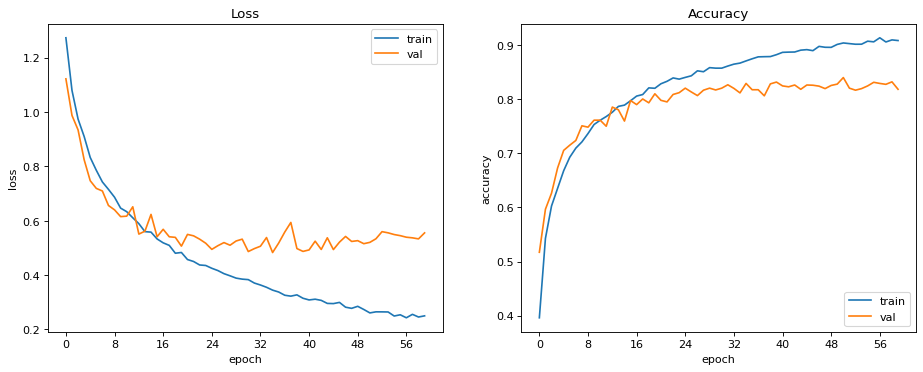

In [15]:
fig = plt.figure(figsize=(14, 5), dpi=80)
ax = fig.add_subplot(1, 2, 1)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_title('Loss')
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend(['train', 'val'], loc='upper right')

ax = fig.add_subplot(1, 2, 2)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
ax.set_title('Accuracy')
ax.set_ylabel('accuracy')
ax.set_xlabel('epoch')
ax.legend(['train', 'val'], loc='lower right')

### 3. (20 คะแนน) ให้แสดง Confusion Matrix ผลการทำนายที่ได้จากโมเดลด้วยข้อมูลเทส

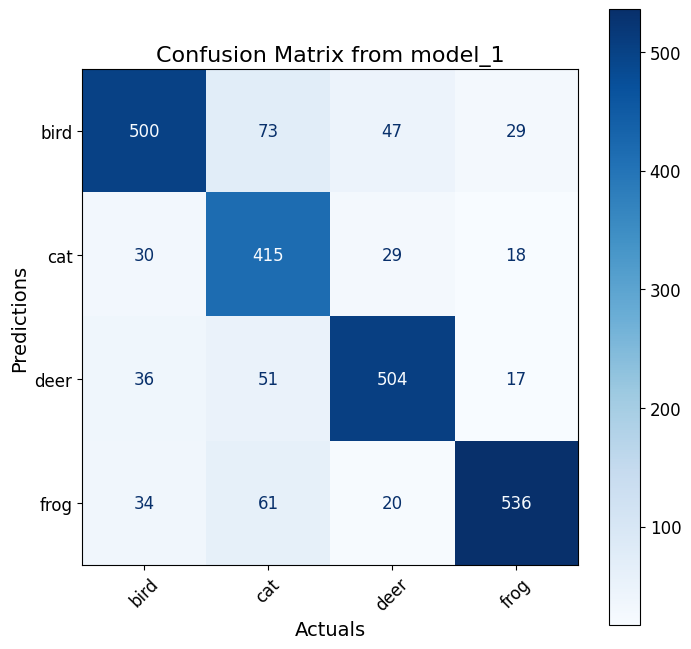

In [16]:
y_pred = model.predict(X_test, verbose=0)
y_test_1d = np.argmax(y_test, axis=1)
y_pred_1d = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test_1d, y_pred_1d).T

plt.rcParams.update({'font.size': 12})
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.xlabel('Actuals', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)    
plt.title('Confusion Matrix from model_1', fontsize=16)
plt.show()

### 4. (20 คะแนน) ให้คำนวณค่า Recall ของแต่ละคลาสด้วยข้อมูลเทส

In [17]:
recall_scores = {}
for i, class_name in enumerate(class_names):
  true_positives = conf_matrix[i, i]
  false_negatives = np.sum(conf_matrix[:, i]) - true_positives
  recall = true_positives / (true_positives + false_negatives)
  recall_scores[class_name] = recall

for class_name, recall in recall_scores.items():
  print(f'Recall for class {class_name}: {recall:.4f}')

Recall for class bird: 0.8333
Recall for class cat: 0.6917
Recall for class deer: 0.8400
Recall for class frog: 0.8933


### 5. (20 คะแนน) จงเปรียบเทียบและอธิบายค่า Recall ที่คำนวณได้จากทั้ง 4 คลาส และให้แสดงภาพจำนวน 5 ภาพที่มาจากคลาสที่มีค่า Recall สูงสุดแต่โมเดลทำนายผิด โดยให้แสดงค่าคลาสของแต่ละภาพที่โมเดลทำนายออกมาด้วย

จากค่า Recall ทั้งหมดพบว่า Class frog มีค่า Recall สูงสุด สามารถบอกได้ว่า model สามารถทำนายรูปภาพกบได้แม่นยำที่สุด และ Class cat มีค่า Recall ต่ำสุด สมารถบอกได้ว่า model ทำนายรูปแมวได้แม่นยำน้อยที่สุด

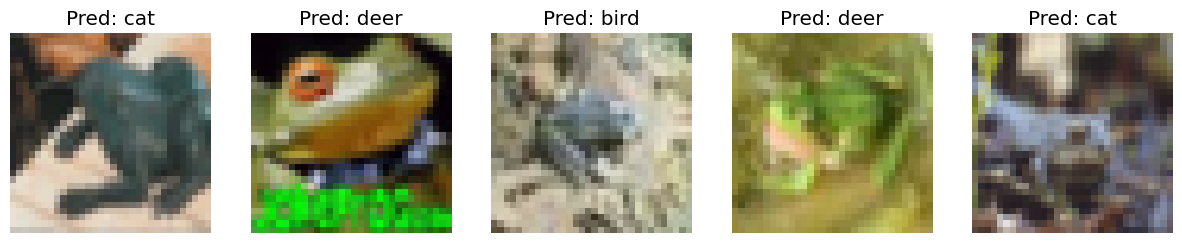

In [18]:
# Find the class with the highest recall score
highest_recall_class = max(recall_scores, key=recall_scores.get)
highest_recall_class_index = class_names.index(highest_recall_class)

# Find the indices of the images that were wrongly classified
wrongly_classified_indices = np.where((y_test_1d == highest_recall_class_index) & (y_pred_1d != highest_recall_class_index))[0]

# Show 5 images from the wrongly classified set
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, idx in enumerate(wrongly_classified_indices[:5]):
  ax = axes[i]
  ax.imshow(X_test_c[idx])
  ax.set_title(f'Pred: {class_names[y_pred_1d[idx]]}')
  ax.axis('off')
plt.show()